No Skill: ROC AUC=0.500
Logistic Train: ROC AUC=0.642
Logistic Test: ROC AUC=0.661


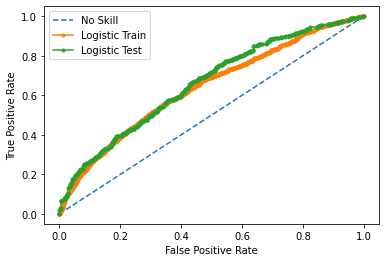

In [20]:
#!/usr/bin/python3.7
#ROC_LogisticRegression.ipynb
#Parth Parakh
#purpose: Receiver Operating Characteristic curve for logistic regression using 
#---------------------------------------------------------------------
#import modules
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
np.seterr(divide='ignore', invalid='ignore')
#---------------------------------------------------------------------


if __name__ == "__main__":
    file = np.loadtxt(open("X.csv", "rb"), delimiter=",")
    X = (file)
    
    file = np.loadtxt(open("y.csv", "rb"), delimiter=",")
    y = (file)
    
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=2)
    
    #model = LogisticRegression(solver='lbfgs')
    #model.fit(trainX, trainy)
    
    model = LogisticRegression(solver='liblinear')
    model.fit(XTrain, yTrain)
    
    ns_probs = [0 for _ in range(len(yTest))]
    ns_auc = roc_auc_score(yTest, ns_probs)
    
    lr_probsTr = model.predict_proba(XTrain)
    lr_probsTr = lr_probsTr[:, 1]
    
    lr_probsTe = model.predict_proba(XTest)
    lr_probsTe = lr_probsTe[:, 1]
       
    lr_aucTr = roc_auc_score(yTrain, lr_probsTr)
    
    lr_aucTe = roc_auc_score(yTest, lr_probsTe)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic Train: ROC AUC=%.3f' % (lr_aucTr))
    
    print('Logistic Test: ROC AUC=%.3f' % (lr_aucTe))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(yTest, ns_probs)
    
    lr_fprTr, lr_tprTr, _ = roc_curve(yTrain, lr_probsTr)
    
    lr_fprTe, lr_tprTe, _ = roc_curve(yTest, lr_probsTe)
    
    # plot the roc curve for the model
    
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fprTr, lr_tprTr, marker='.', label='Logistic Train')
    pyplot.plot(lr_fprTe, lr_tprTe, marker='.', label='Logistic Test')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()